In [1]:
import bs4 as bs
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        ticker = str.rstrip(ticker)
        tickers.append(ticker)
    # with open("sp500tickers.pickle", "wb") as f:
    #     pickle.dump(tickers, f)
    return tickers


def get_data_from_yahoo(tickers):
    # if reload_sp500:
    # tickers = save_sp500_tickers()
    # else:
    #     with open("sp500tickers.pickle", "rb") as f:
    #         tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    tickers_in = []
    tickers_out = []

    # df = pd.DataFrame
    for ticker in tickers:
        ticker = str.rstrip(ticker)
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists(f'stock_dfs/{ticker}.csv'):
            try:
                # print(str.rstrip(ticker))
                df = web.DataReader(ticker, 'yahoo', start, end)
                tickers_in.append(ticker)
                df.to_csv(f'stock_dfs/{ticker}.csv')

            except:
                print(ticker)
                tickers_out.append(ticker)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            # df = df.drop("Symbol", axis=1)

        else:
            print(f'Already have {ticker}')

    print(f'{len(tickers_in)}/{len(tickers_in) + len(tickers_out)} Companies in S&P500 index are available')

    return tickers_out

def compile_data(tickers):
    # with open("sp500tickers.pickle", "rb") as f:
    #     tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv(f'stock_dfs/{ticker}.csv')
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 100 == 0:
            print(f'{count}/{len(tickers)} Companies have been loaded')

    # print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

    return main_df

In [3]:
tickers = save_sp500_tickers()
tickers.remove('BF.B')
tickers.remove('BRK.B')
tickers_out = get_data_from_yahoo(tickers)

try:
    df = pd.read_csv('sp500_joined_closes.csv')
except:

    # tickers = [tickers.remove(out) for out in tickers_out]
    df = compile_data(tickers) # check validity

df.head()

Already have MMM
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AMCR
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have ADI
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ANET
Already have AJG
Already have AIZ
Already have T
Already have ATO
Already have ADSK
Already have ADP
Already have AZO
Already have AV

,Date,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2010-01-04,61.288338,20.074522,NaN,8.74,33.718582,10.126624,37.090000,9.70,39.103363,...,41.963718,14.129536,16.527702,19.830650,NaN,20.231468,28.670000,55.381721,11.648637,NaN
1,2010-01-05,60.904442,19.912334,NaN,8.53,33.926979,10.144546,37.700001,9.71,38.870968,...,44.515926,13.961965,16.546856,19.580618,NaN,20.162270,28.620001,57.134892,12.059352,NaN
2,2010-01-06,61.768192,20.022911,NaN,8.40,34.287651,10.090778,37.619999,9.57,39.209885,...,43.932011,13.988779,16.393644,19.447794,NaN,20.018137,28.400000,57.116451,13.107989,NaN
3,2010-01-07,61.812481,20.188793,NaN,8.40,34.255581,9.848815,36.889999,9.47,39.200214,...,44.870213,13.928458,16.470243,19.252451,NaN,20.012373,27.690001,58.426708,14.576083,NaN
4,2010-01-08,62.248039,20.292002,NaN,8.23,34.119335,9.768159,36.689999,9.43,39.355148,...,44.548744,13.935160,16.412785,19.533739,NaN,20.018137,27.600000,57.199497,14.340141,NaN


In [4]:
sp500 = pd.read_csv('stock_dfs/sp500.csv')
# sp500.set_index("Date", inplace=True)
sp500.set_index('Date', inplace=True)

sp500.rename(columns={'Adj Close': 'SP500'}, inplace=True)
sp500.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

sp500.head()

,SP500
Date,
2010-01-04,1132.989990
2010-01-05,1136.520020
2010-01-06,1137.140015
2010-01-07,1141.689941
2010-01-08,1144.979980


# Data Frames Preprocessing

(MMM     0
 ABT     0
 ABMD    0
 ACN     0
 ATVI    0
        ..
 XLNX    0
 YUM     0
 ZBRA    0
 ZBH     0
 ZION    0
 Length: 445, dtype: int64,
 <AxesSubplot:>)

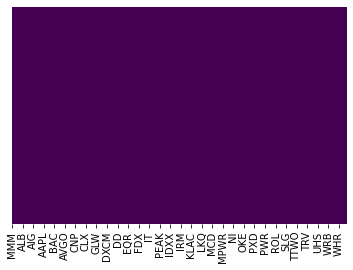

In [5]:
df = df.dropna(axis=1)
df = df.drop('Date', axis=1)
df.isnull().sum(), sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')




# Visualization

# Models


In [6]:
class AttentionLayer(nn.Module):
    def __init__(self, hidden_size):
        super(AttentionLayer, self).__init__()

        self.W_b = nn.Linear(hidden_size, hidden_size)
        self.v_b = nn.Linear(hidden_size, 1)


    def forward(self, Y_tag):
       j = self.v_b.T @ nn.Tanh(self.W_b(Y_tag.T))
       beta = nn.Softmax(j)

       return beta.T @ Y_tag

In [246]:
class MI_Cell(nn.Module):
    def __init__(self, input_size, batch_size ,x_size, hidden_size, output_size):
        super(MI_Cell, self).__init__()
        self.hidden_dim = hidden_size

        # self.W_f = nn.Linear(hidden_size, hidden_size + x_size)
        self.W_f = nn.Parameter(nn.init.xavier_normal_(torch.zeros(1, hidden_size, hidden_size + x_size)))
        self.sig_f = nn.Sigmoid()
        self.W_o = nn.Parameter(nn.init.xavier_normal_(torch.zeros(1, hidden_size, hidden_size + x_size)))
        self.sig_o = nn.Sigmoid()

        self.W_c = nn.Parameter(nn.init.xavier_normal_(torch.zeros(1, hidden_size, hidden_size + x_size)))
        self.tanh_c = nn.Tanh()
        self.W_cp = nn.Parameter(nn.init.xavier_normal_(torch.zeros(1, hidden_size, hidden_size + x_size)))
        self.tanh_cp = nn.Tanh()
        self.W_cn = nn.Parameter(nn.init.xavier_normal_(torch.zeros(1, hidden_size, hidden_size + x_size)))
        self.tanh_cn = nn.Tanh()
        self.W_ci = nn.Parameter(nn.init.xavier_normal_(torch.zeros(1, hidden_size, hidden_size + x_size)))
        self.tanh_ci = nn.Tanh()

        self.W_i = nn.Parameter(nn.init.xavier_normal_(torch.zeros(1, hidden_size, hidden_size + x_size)))
        self.sig_i = nn.Sigmoid()
        self.W_ip = nn.Parameter(nn.init.xavier_normal_(torch.zeros(1, hidden_size, hidden_size + x_size)))
        self.sig_ip = nn.Sigmoid()
        self.W_in = nn.Parameter(nn.init.xavier_normal_(torch.zeros(1, hidden_size, hidden_size + x_size)))
        self.sig_in = nn.Sigmoid()
        self.W_ii = nn.Parameter(nn.init.xavier_normal_(torch.zeros(1, hidden_size, hidden_size + x_size)))
        self.sig_ii = nn.Sigmoid()

        self.W_a = nn.Parameter(nn.init.xavier_normal_(torch.zeros(1, hidden_size, hidden_size)))
        # self.W_a = nn.Linear(, hidden_size)
        self.tanh_a = nn.Tanh()
        self.softmax_input = nn.Softmax()

        self.tanh_out = nn.Tanh()
        # self.Y_tag =


    def forward(self, x, p, n, i):

        c_t_prev = nn.init.xavier_normal_(torch.zeros(x.size(0), self.hidden_dim, 1)).requires_grad_().to(device)
        h_t_prev = torch.zeros(x.size(0), self.hidden_dim, 1).requires_grad_().to(device)

        # print(h_t_prev.size(), x.size())


        x = torch.cat((x, h_t_prev), dim=1)
        p = torch.cat((p, h_t_prev), dim=1)
        n = torch.cat((n, h_t_prev), dim=1)
        i = torch.cat((i, h_t_prev), dim=1)
        # print(x.size())
        # print((self.W_f @ x).size())
        f_t = self.sig_f(self.W_f @ x)

        L_t = self.input_gate(x, p, n, i , c_t_prev)

        o_t = self.sig_o(self.W_o @ x)
        # print(f' c_t {c_t_prev.size()}, f_t:{f_t.size()}')
        c_t = c_t_prev * f_t + L_t
        # print(f'c_t size: {c_t.size()}\n o_t size: {o_t.size()}')
        h_t = self.tanh_out(c_t).view(c_t.size(0), 1, -1) @ o_t
        # print(h_t.size())
        # self.Y_tag.append(h_t)

        h_t_prev = h_t
        c_t_prev = c_t

        # return self.Y_tag


    def input_gate(self, x, p, n, i, c_t_prev):

        c_t = self.tanh_c(self.W_c @ x)
        c_pt = self.tanh_cp(self.W_cp @ p)
        c_nt = self.tanh_cn(self.W_cn @ n)
        c_it = self.tanh_ci(self.W_ci @ i)
        # print(c_t)
        i_t = self.sig_i(self.W_i @ x)
        i_pt = self.sig_ip(self.W_ip @ x)
        i_nt = self.sig_in(self.W_in @ x)
        i_it = self.sig_ii(self.W_ii @ x)
        # print(c_t.size(), i_it.size())
        # print(i_it)
        I_t = c_t * i_t
        I_pt = c_pt * i_pt
        I_nt = c_nt * i_nt
        I_it = c_it * i_it
        print(I_t.size())
        # print(I_t.view(I_t.size(0), 1, -1).size(), c_t_prev.size())
        # print(c_t_prev)
        u_t = self.tanh_a(I_t.view(I_t.size(0), 1, -1) @ (self.W_a @ c_t_prev))
        u_pt = self.tanh_a(I_pt.view(I_t.size(0), 1, -1) @ (self.W_a @ c_t_prev))
        u_nt = self.tanh_a(I_nt.view(I_t.size(0), 1, -1) @ (self.W_a @ c_t_prev))
        u_it = self.tanh_a(I_it.view(I_t.size(0), 1, -1) @ (self.W_a @ c_t_prev))
        # print(u_t, u_it, u_nt, u_pt)
        # print(u_t)
        # print(torch.cat((u_t, u_it, u_nt, u_pt), dim=1).size())
        α = self.softmax_input(torch.cat((u_t, u_it, u_nt, u_pt), dim=1))
        # print(f' alpha size: {a[:, 0, :].size()}')
        α_t, α_pt, α_nt, α_it = α[:, 0, :].view(α.size(0), 1, 1),\
                                α[:, 1, :].view(α.size(0), 1, 1),\
                                α[:, 2, :].view(α.size(0), 1, 1),\
                                α[:, 3, :].view(α.size(0), 1, 1)
        # print(f' size {α_t.shape}, I_t size: {I_t.size()}')
        # print((α_t * I_t).size())
        return α_t * I_t + I_pt * α_pt + I_nt * α_nt + I_it * α_it

In [8]:
c = torch.rand(3,5,10)
v = torch.rand(2,5,10)
print(torch.cat(c,v).size())

TypeError: cat() received an invalid combination of arguments - got (Tensor, Tensor), but expected one of:
 * (tuple of Tensors tensors, name dim, *, Tensor out)
 * (tuple of Tensors tensors, int dim, *, Tensor out)


In [ ]:
class MI_LSTM(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, output_size):
        super(MI_LSTM, self).__init__()

        self.multi_input_lstm = MI_Cell()
        self.attention_layer = AttentionLayer()

        self.fc1 = nn.Linear()
        self.fc2 = nn.Linear()

    def forward(self, x):
        Y_tag = self.multi_input_lstm(x)
        y_tilda = self.attention_layer(Y_tag)

        fc1 = nn.ReLU(self.fc1(y_tilda))
        y_hat_T = nn.ReLU(self.fc2(fc1))

        return y_hat_T


In [9]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # h0 = torch.zeros(self.n_layers, x.size(0), self.hidden_dim).requires_grad_()
        # c0 = torch.zeros(self.n_layers, x.size(0), self.hidden_dim).requires_grad()

        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.n_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.n_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        # print(x.size(), h0.size(), c0.size())
        out, _ = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        # print(out.size())
        return out

In [10]:
a = torch.ones(2,3,1)
b = torch.ones(2,5,1)
# a[0].size()
torch.cat((a,b), 1)

tensor([[[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]]])

# Preprocessing data



In [11]:
def split_data(stock, window_size, rate ):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []

    # create all possible sequences of length seq_len
    for i in range(len(data_raw) - window_size):
        data.append(data_raw[i: i + window_size])

    data = np.array(data)
    test_set_size = int(np.floor(rate * data.shape[0]))
    train_set_size = data.shape[0] - test_set_size

    x_train = data[:train_set_size,:-1]
    y_train = data[:train_set_size,-1]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1]

    x_train = torch.from_numpy(x_train).type(torch.Tensor)
    x_test = torch.from_numpy(x_test).type(torch.Tensor)
    y_train = torch.from_numpy(y_train).type(torch.Tensor)
    y_test = torch.from_numpy(y_test).type(torch.Tensor)

    return [x_train, y_train, x_test, y_test]


In [12]:
scaler = MinMaxScaler(feature_range=(-1,1))

names = df.columns
df_values = df.to_numpy()

df_values = np.array([scaler.fit_transform(col.reshape(-1, 1)) for col in df_values.T])
print(df_values.shape)

df_values = df_values.reshape(445,-1).T
print(df_values.shape)

df_norm = pd.DataFrame(df_values)
df_norm.columns = names

df_sp500 = pd.DataFrame(scaler.fit_transform(sp500))
df_sp500.columns = sp500.columns

df_norm.head(), df_sp500.head()

(445, 2802, 1)
(2802, 445)


(        MMM       ABT      ABMD       ACN      ATVI      ADBE       AMD  \
 0 -0.926278 -0.947719 -0.996153 -0.963914 -0.975621 -0.943652 -0.831015   
 1 -0.930583 -0.950639 -0.997103 -0.962147 -0.975243 -0.941265 -0.830806   
 2 -0.920897 -0.948648 -0.997692 -0.959089 -0.976377 -0.941578 -0.833734   
 3 -0.920400 -0.945661 -0.997692 -0.959361 -0.981479 -0.944435 -0.835826   
 4 -0.915516 -0.943802 -0.998461 -0.960516 -0.983180 -0.945217 -0.836662   
 
         AAP       AES       AFL  ...       WMB      WLTW      WYNN       XEL  \
 0 -0.985185 -0.666238 -0.734199  ... -0.882352 -0.986120 -0.975757 -0.977064   
 1 -0.988099 -0.676033 -0.709325  ... -0.875005 -0.987532 -0.946286 -0.982578   
 2 -0.983849 -0.685829 -0.701575  ... -0.855685 -0.977416 -0.953029 -0.981696   
 3 -0.983970 -0.685130 -0.692023  ... -0.860039 -0.979298 -0.942195 -0.983680   
 4 -0.982027 -0.658541 -0.701035  ... -0.855141 -0.980004 -0.945907 -0.983460   
 
         XRX      XLNX       YUM      ZBRA       ZBH  

In [13]:
# TODO: minmax scaler for any company instead of oly one
pearson = df_norm.corr(method='pearson')
pearson = pearson.sort_values(by='AAPL')['AAPL']

pos = pearson[-11:-1]
pos = df_norm[pos.index.values]

neg = pearson[:10]
neg = df_norm[neg.index.values]

pos.head(), neg.head()

(       KLAC       TER       BIO      ANSS      CDNS      ODFL      POOL  \
 0 -0.964667 -0.972490 -0.943634 -0.967875 -0.990465 -0.992294 -0.995552   
 1 -0.966193 -0.971934 -0.937746 -0.973357 -0.991319 -0.990529 -0.994645   
 2 -0.966714 -0.973324 -0.935095 -0.974947 -0.990323 -0.988987 -0.997504   
 3 -0.965969 -0.972490 -0.930998 -0.974344 -0.988615 -0.993107 -0.998048   
 4 -0.963923 -0.970823 -0.932685 -0.972699 -0.987335 -0.991986 -0.998684   
 
        MPWR       WST      SNPS  
 0 -0.935525 -0.981482 -0.985421  
 1 -0.935974 -0.983020 -0.986820  
 2 -0.939574 -0.984190 -0.987115  
 3 -0.941149 -0.983820 -0.987557  
 4 -0.939979 -0.983851 -0.986379  ,
         APA       DVN       OXY       SLB       NOV       MOS       MRO  \
 0  0.558694  0.600238  0.324298 -0.070815 -0.202535  0.316866 -0.285514   
 1  0.577961  0.602057  0.312840 -0.067379 -0.184739  0.352346 -0.284678   
 2  0.603854  0.596826  0.331746 -0.040260 -0.169835  0.411970 -0.264900   
 3  0.578423  0.586592  0.3

In [14]:
positive = pos
negative = neg
index = df_sp500
x = df_norm['AAPL']

In [15]:
input_dim = 1
hidden_dim = 50
num_layers = 2
output_dim = 1
batch_size = 32
epochs = 50

window_size = 30
rate = .2

In [16]:
# dim0 = x_train.size(0) // batch_size
# head_trunc =  x_train.size(0) % batch_size
#
# print(x_train[head_trunc:].view(x_train.size(0) // batch_size, batch_size, -1, 1).size())
# print(y_train[head_trunc:].view(x_train.size(0) // batch_size, batch_size, 1).size())
#
# x_train_2 = x_train[head_trunc:].view(x_train.size(0) // batch_size, batch_size, -1)
# y_train_2 = y_train[head_trunc:].view(x_train.size(0) // batch_size, batch_size)

In [17]:
def train(x_train, y_train, model, criterion, optimizer, epochs, batch_size, device):

    epoch_loss = []
    for epoch in range(epochs):

        batches_loss = 0.
        for i, (inputs, labels) in enumerate(zip(x_train, y_train)):

            inputs, labels = inputs.to(device), labels.to(device)
            # head_trunc = x_train.size(0) % batch_size

            # inputs = x_train[head_trunc:].view(x_train.size(0) // batch_size, batch_size, -1).to(device)
            # labels = y_train[head_trunc:].view(x_train.size(0) // batch_size, batch_size).to(device)
            optimizer.zero_grad()

            outputs = model(inputs.unsqueeze(dim=2))
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            # epoch_loss.append(loss.item())
            batches_loss += loss.item()
            if i % 25 == 0:
                print(f'epoch: {epoch+1}/{epochs}, batch_loss: {loss.item():.5f}')
        # print(f'epoch: {epoch+1}\{epochs}, loss: {loss.item()}')

        epoch_loss.append(batches_loss)

    # [print(l) for l in epoch_loss]
    return epoch_loss


In [18]:
def test_model(x_test, y_test, model, criterion):
    with torch.no_grad():
        outputs = model(x_test.to(device))
        loss = criterion(outputs, y_test.to(device))
        print(loss.item())
    return outputs


In [19]:
x_train, y_train, x_test, y_test = split_data(x, window_size, rate)

head_trunc = x_train.size(0) % batch_size

x_train = x_train[head_trunc:]
x_train = x_train.view(x_train.size(0) // batch_size, batch_size, -1)

y_train = y_train[head_trunc:]
y_train = y_train.view(y_train.size(0) // batch_size, batch_size)

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  torch.Size([69, 32, 29])
y_train.shape =  torch.Size([69, 32])
x_test.shape =  torch.Size([554, 29])
y_test.shape =  torch.Size([554])


In [20]:
model_self = LSTM(input_dim, hidden_dim, num_layers, output_dim).to(device)
criterion_self = nn.MSELoss()
optimizer_self = torch.optim.Adam(model_self.parameters())

In [21]:
train_self = train(x_train, y_train, model_self, criterion_self, optimizer_self, epochs, batch_size, device)
predictions = test_model(x_test.unsqueeze(dim=2), y_test, model_self, criterion_self)

/Users/yuvalmargules/opt/anaconda3/envs/debugger/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/yuvalmargules/opt/anaconda3/envs/debugger/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([554])) that is different to the input size (torch.Size([554, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1/50, batch_loss: 0.77164
epoch: 1/50, batch_loss: 0.00062
epoch: 1/50, batch_loss: 0.00232
epoch: 2/50, batch_loss: 0.22418
epoch: 2/50, batch_loss: 0.00832
epoch: 2/50, batch_loss: 0.00150
epoch: 3/50, batch_loss: 0.19549
epoch: 3/50, batch_loss: 0.00026
epoch: 3/50, batch_loss: 0.00169
epoch: 4/50, batch_loss: 0.17840
epoch: 4/50, batch_loss: 0.00045
epoch: 4/50, batch_loss: 0.00218
epoch: 5/50, batch_loss: 0.16504
epoch: 5/50, batch_loss: 0.00161
epoch: 5/50, batch_loss: 0.00256
epoch: 6/50, batch_loss: 0.15611
epoch: 6/50, batch_loss: 0.00243
epoch: 6/50, batch_loss: 0.00275
epoch: 7/50, batch_loss: 0.14972
epoch: 7/50, batch_loss: 0.00305
epoch: 7/50, batch_loss: 0.00285
epoch: 8/50, batch_loss: 0.14433
epoch: 8/50, batch_loss: 0.00336
epoch: 8/50, batch_loss: 0.00285
epoch: 9/50, batch_loss: 0.13965
epoch: 9/50, batch_loss: 0.00349
epoch: 9/50, batch_loss: 0.00279
epoch: 10/50, batch_loss: 0.13502
epoch: 10/50, batch_loss: 0.00348
epoch: 10/50, batch_loss: 0.00271
epoch: 

In [22]:
with torch.no_grad():
    outputs_self = model_self(x_train.view(-1, 29, 1))

outputs_self.shape

torch.Size([2208, 1])

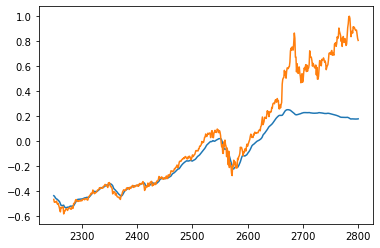

In [23]:
arange = np.arange(2802)
plt.plot(arange[-predictions.shape[0]:],predictions.numpy())
plt.plot(arange[-predictions.shape[0]:],y_test.numpy())


In [30]:
x_train, y_train, x_test, y_test = split_data(index, window_size, rate)

head_trunc = x_train.size(0) % batch_size

x_train = x_train[head_trunc:]
x_train = x_train.view(x_train.size(0) // batch_size, batch_size, -1)

y_train = y_train[head_trunc:]
y_train = y_train.view(y_train.size(0) // batch_size, batch_size)

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  torch.Size([69, 32, 29])
y_train.shape =  torch.Size([69, 32])
x_test.shape =  torch.Size([554, 29, 1])
y_test.shape =  torch.Size([554, 1])


In [31]:
model_index = LSTM(input_dim, hidden_dim, num_layers, output_dim).to(device)
criterion_index = nn.MSELoss()
optimizer_index = torch.optim.Adam(model_index.parameters())

train_index = train(x_train, y_train, model_index, criterion_index, optimizer_index, epochs, batch_size, device)
predictions = test_model(x_test, y_test, model_index, criterion_index)

/Users/yuvalmargules/opt/anaconda3/envs/debugger/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1/50, batch_loss: 0.71459
epoch: 1/50, batch_loss: 0.01679
epoch: 1/50, batch_loss: 0.00755
epoch: 2/50, batch_loss: 0.49938
epoch: 2/50, batch_loss: 0.00925
epoch: 2/50, batch_loss: 0.01030
epoch: 3/50, batch_loss: 0.44108
epoch: 3/50, batch_loss: 0.01043
epoch: 3/50, batch_loss: 0.01052
epoch: 4/50, batch_loss: 0.37408
epoch: 4/50, batch_loss: 0.06036
epoch: 4/50, batch_loss: 0.00297
epoch: 5/50, batch_loss: 0.28019
epoch: 5/50, batch_loss: 0.05485
epoch: 5/50, batch_loss: 0.00025
epoch: 6/50, batch_loss: 0.17459
epoch: 6/50, batch_loss: 0.04011
epoch: 6/50, batch_loss: 0.00035
epoch: 7/50, batch_loss: 0.13945
epoch: 7/50, batch_loss: 0.03257
epoch: 7/50, batch_loss: 0.00046
epoch: 8/50, batch_loss: 0.10602
epoch: 8/50, batch_loss: 0.02547
epoch: 8/50, batch_loss: 0.00037
epoch: 9/50, batch_loss: 0.09170
epoch: 9/50, batch_loss: 0.02052
epoch: 9/50, batch_loss: 0.00032
epoch: 10/50, batch_loss: 0.07797
epoch: 10/50, batch_loss: 0.01631
epoch: 10/50, batch_loss: 0.00035
epoch: 

In [32]:
with torch.no_grad():
    outputs_index = model_index(x_train.view(-1, 29, 1))

outputs_index.shape

torch.Size([2208, 1])

In [33]:
# implement nn.LSTM regular model to see differences

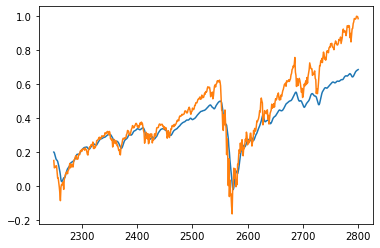

In [34]:
arange = np.arange(2802)
plt.plot(arange[-predictions.shape[0]:],predictions.numpy())
plt.plot(arange[-predictions.shape[0]:],y_test.numpy())


/Users/yuvalmargules/opt/anaconda3/envs/debugger/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/yuvalmargules/opt/anaconda3/envs/debugger/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/yuvalmargules/opt/anaconda3/envs/debugger/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely l

epoch: 1/50, batch_loss: 0.68070
epoch: 1/50, batch_loss: 0.00777
epoch: 1/50, batch_loss: 0.00623
epoch: 2/50, batch_loss: 0.21542
epoch: 2/50, batch_loss: 0.00807
epoch: 2/50, batch_loss: 0.00327
epoch: 3/50, batch_loss: 0.18649
epoch: 3/50, batch_loss: 0.01676
epoch: 3/50, batch_loss: 0.00158
epoch: 4/50, batch_loss: 0.16791
epoch: 4/50, batch_loss: 0.01863
epoch: 4/50, batch_loss: 0.00114
epoch: 5/50, batch_loss: 0.16205
epoch: 5/50, batch_loss: 0.01798
epoch: 5/50, batch_loss: 0.00107
epoch: 6/50, batch_loss: 0.15384
epoch: 6/50, batch_loss: 0.01574
epoch: 6/50, batch_loss: 0.00121
epoch: 7/50, batch_loss: 0.15031
epoch: 7/50, batch_loss: 0.01270
epoch: 7/50, batch_loss: 0.00156
epoch: 8/50, batch_loss: 0.14722
epoch: 8/50, batch_loss: 0.00971
epoch: 8/50, batch_loss: 0.00207
epoch: 9/50, batch_loss: 0.14473
epoch: 9/50, batch_loss: 0.00730
epoch: 9/50, batch_loss: 0.00274
epoch: 10/50, batch_loss: 0.14184
epoch: 10/50, batch_loss: 0.00523
epoch: 10/50, batch_loss: 0.00346
epoch: 

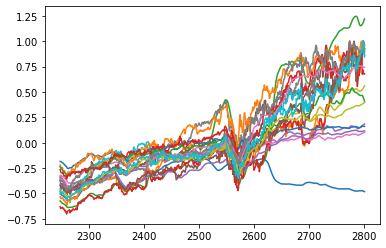

In [35]:
outputs_pos = 0.

for col in positive.columns:
    p = pd.DataFrame(positive[col])

    x_train, y_train, x_test, y_test = split_data(p, window_size, rate)

    head_trunc = x_train.size(0) % batch_size

    x_train = x_train[head_trunc:]
    x_train = x_train.view(x_train.size(0) // batch_size, batch_size, -1)

    y_train = y_train[head_trunc:]
    y_train = y_train.view(y_train.size(0) // batch_size, batch_size)

    model_pos = LSTM(input_dim, hidden_dim, num_layers, output_dim).to(device)
    criterion_pos = nn.MSELoss()
    optimizer_pos = torch.optim.Adam(model_pos.parameters())

    train_pos = train(x_train, y_train, model_pos, criterion_pos, optimizer_pos, epochs, batch_size, device)
    predictions = test_model(x_test, y_test, model_pos, criterion_pos)

    with torch.no_grad():
        outputs_pos += model_pos(x_train.view(-1, 29, 1))

    arange = np.arange(2802)
    plt.plot(arange[-predictions.shape[0]:],predictions.numpy())
    plt.plot(arange[-predictions.shape[0]:],y_test.numpy())

outputs_pos /= len(positive.columns)

/Users/yuvalmargules/opt/anaconda3/envs/debugger/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/yuvalmargules/opt/anaconda3/envs/debugger/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/yuvalmargules/opt/anaconda3/envs/debugger/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely l

epoch: 1/50, batch_loss: 0.19748
epoch: 1/50, batch_loss: 0.01899
epoch: 1/50, batch_loss: 0.09341
epoch: 2/50, batch_loss: 0.52496
epoch: 2/50, batch_loss: 0.00428
epoch: 2/50, batch_loss: 0.08278
epoch: 3/50, batch_loss: 0.11943
epoch: 3/50, batch_loss: 0.02868
epoch: 3/50, batch_loss: 0.00489
epoch: 4/50, batch_loss: 0.01802
epoch: 4/50, batch_loss: 0.00831
epoch: 4/50, batch_loss: 0.00288
epoch: 5/50, batch_loss: 0.01308
epoch: 5/50, batch_loss: 0.01032
epoch: 5/50, batch_loss: 0.00274
epoch: 6/50, batch_loss: 0.00735
epoch: 6/50, batch_loss: 0.00973
epoch: 6/50, batch_loss: 0.00283
epoch: 7/50, batch_loss: 0.00471
epoch: 7/50, batch_loss: 0.00997
epoch: 7/50, batch_loss: 0.00289
epoch: 8/50, batch_loss: 0.00366
epoch: 8/50, batch_loss: 0.00977
epoch: 8/50, batch_loss: 0.00299
epoch: 9/50, batch_loss: 0.00329
epoch: 9/50, batch_loss: 0.00962
epoch: 9/50, batch_loss: 0.00306
epoch: 10/50, batch_loss: 0.00320
epoch: 10/50, batch_loss: 0.00943
epoch: 10/50, batch_loss: 0.00314
epoch: 

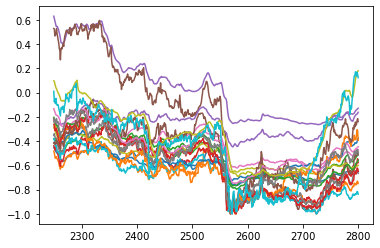

In [36]:
outputs_neg = 0.

for col in negative.columns:
    n = pd.DataFrame(negative[col])

    x_train, y_train, x_test, y_test = split_data(n, window_size, rate)

    head_trunc = x_train.size(0) % batch_size

    x_train = x_train[head_trunc:]
    x_train = x_train.view(x_train.size(0) // batch_size, batch_size, -1)

    y_train = y_train[head_trunc:]
    y_train = y_train.view(y_train.size(0) // batch_size, batch_size)

    model_neg = LSTM(input_dim, hidden_dim, num_layers, output_dim).to(device)
    criterion_neg = nn.MSELoss()
    optimizer_neg = torch.optim.Adam(model_neg.parameters())

    train_neg = train(x_train, y_train, model_neg, criterion_neg, optimizer_neg, epochs, batch_size, device)
    predictions = test_model(x_test, y_test, model_neg, criterion_neg)

    with torch.no_grad():
        outputs_neg += model_neg(x_train.view(-1, 29, 1))

    arange = np.arange(2802)
    plt.plot(arange[-predictions.shape[0]:],predictions.numpy())
    plt.plot(arange[-predictions.shape[0]:],y_test.numpy())

outputs_neg /= 10

In [37]:
# x_train, y_train, x_test, y_test = split_data(x, window_size, rate)
#
# head_trunc = x_train.size(0) % batch_size
#
# x_train = x_train[head_trunc:]
# x_train = x_train.view(x_train.size(0) // batch_size, batch_size, -1)
#
# y_train = y_train[head_trunc:]
# y_train = y_train.view(y_train.size(0) // batch_size, batch_size)
#
# print('x_train.shape = ',x_train.shape)
# print('y_train.shape = ',y_train.shape)
# print('x_test.shape = ',x_test.shape)
# print('y_test.shape = ',y_test.shape)

In [38]:
def split_after_lstm(stock, window_size):
    data_raw = stock
    data = []

    # create all possible sequences of length seq_len
    for i in range(len(data_raw) - window_size):
        data.append(data_raw[i: i + window_size])

    data = np.array(data)

    x_train = data[:, :-1]
    y_train = data[:, -1]

    x_train = torch.from_numpy(x_train).type(torch.Tensor)
    y_train = torch.from_numpy(y_train).type(torch.Tensor)

    return [x_train, y_train, x_test, y_test]

In [163]:
self_x_train, self_y_train, _, _ =  split_after_lstm(outputs_self.numpy(), window_size)
head_trunc = self_x_train.size(0) % batch_size

self_x_train = self_x_train[head_trunc:]
self_x_train = self_x_train.view(self_x_train.size(0) // batch_size, batch_size, -1)
self_y_train = self_y_train[head_trunc:]
self_y_train = self_y_train.view(self_y_train.size(0) // batch_size, batch_size)

p_x_train, p_y_train, _, _ = split_after_lstm(outputs_pos.numpy(), window_size)

p_x_train = p_x_train[head_trunc:]
p_x_train = p_x_train.view(p_x_train.size(0) // batch_size, batch_size, -1)
p_y_train = p_y_train[head_trunc:]
p_y_train = p_y_train.view(p_y_train.size(0) // batch_size, batch_size)

n_x_train, n_y_train, _, _ = split_after_lstm(outputs_neg.numpy(), window_size)

n_x_train = n_x_train[head_trunc:]
n_x_train = n_x_train.view(n_x_train.size(0) // batch_size, batch_size, -1)
n_y_train = n_y_train[head_trunc:]
n_y_train = n_y_train.view(n_y_train.size(0) // batch_size, batch_size)

index_x_train, index_y_train, _, _ = split_after_lstm(outputs_index.numpy(), window_size)

index_x_train = index_x_train[head_trunc:]
index_x_train = index_x_train.view(index_x_train.size(0) // batch_size, batch_size, -1)
index_y_train = index_y_train[head_trunc:]
index_y_train = index_y_train.view(index_y_train.size(0) // batch_size, batch_size)

self_x_train.size(), self_y_train.size()

(torch.Size([68, 32, 29]), torch.Size([68, 32]))

In [247]:
mi_model = MI_Cell(1, x_train.size(1), x_train.size(2), hidden_dim, output_dim)
mi_optimizer = torch.optim.Adam(mi_model.parameters())
mi_criterion = nn.MSELoss()

In [248]:
mi_model(self_x_train[0].unsqueeze(dim=2),
         p_x_train[0].unsqueeze(dim=2),
         n_x_train[0].unsqueeze(dim=2),
         index_x_train[0].unsqueeze(dim=2))


torch.Size([32, 50, 1])


/Users/yuvalmargules/opt/anaconda3/envs/debugger/lib/python3.7/site-packages/ipykernel_launcher.py:98: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [180]:
# self_x_train.shape
print(x_train[0].shape)


torch.Size([32, 29])


In [152]:
a = torch.zeros(2, 5, 1).requires_grad_().to(device)
b = torch.zeros(2, 1, 5).requires_grad_().to(device)
a.size()

torch.Size([2, 5, 1])

In [236]:
x_train.size()


torch.Size([69, 32, 29])